<a href="https://colab.research.google.com/github/neelgandhi26/Telco-Churn-Analysis/blob/master/Poverty_Data_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries and Dataset**

In [1]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd

# Matplotlib and Seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns


# Importing Machine Learning related packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('/content/Poverty Data.csv')

**Descriptive Statistics**

In [ ]:
df.dtypes

row_id                                                int64
area__rucc                                           object
area__urban_influence                                object
econ__economic_typology                              object
econ__pct_civilian_labor                            float64
econ__pct_unemployment                              float64
econ__pct_uninsured_adults                          float64
econ__pct_uninsured_children                        float64
demo__pct_female                                    float64
demo__pct_below_18_years_of_age                     float64
demo__pct_aged_65_years_and_older                   float64
demo__pct_hispanic                                  float64
demo__pct_non_hispanic_african_american             float64
demo__pct_non_hispanic_white                        float64
demo__pct_american_indian_or_alaskan_native         float64
demo__pct_asian                                     float64
demo__pct_adults_less_than_a_high_school

In [ ]:
df.isnull().sum()

row_id                                                 0
area__rucc                                             0
area__urban_influence                                  0
econ__economic_typology                                0
econ__pct_civilian_labor                               0
econ__pct_unemployment                                 0
econ__pct_uninsured_adults                             2
econ__pct_uninsured_children                           2
demo__pct_female                                       2
demo__pct_below_18_years_of_age                        2
demo__pct_aged_65_years_and_older                      2
demo__pct_hispanic                                     2
demo__pct_non_hispanic_african_american                2
demo__pct_non_hispanic_white                           2
demo__pct_american_indian_or_alaskan_native            2
demo__pct_asian                                        2
demo__pct_adults_less_than_a_high_school_diploma       0
demo__pct_adults_with_high_scho

In [ ]:
# Removing Noise Variable
df = df.drop(['row_id'], axis=1)

**Handling Missing Values **

In [ ]:
# Removing missing values where less than 5% of the data is missing
df = df.dropna(subset=['econ__pct_uninsured_adults', 'econ__pct_uninsured_children','demo__pct_female','demo__pct_below_18_years_of_age','demo__pct_aged_65_years_and_older','demo__pct_hispanic','demo__pct_non_hispanic_african_american','demo__pct_non_hispanic_white','demo__pct_american_indian_or_alaskan_native','demo__pct_asian','health__pct_adult_obesity','health__pct_diabetes','health__pct_physical_inacticity','health__air_pollution_particulate_matter'])

In [ ]:
# Imputing missing values using median where less than 20% of data is missing
df['health__pct_adult_smoking'] = df['health__pct_adult_smoking'].fillna((df['health__pct_adult_smoking'].median()))
df['health__pct_low_birthweight'] = df['health__pct_low_birthweight'].fillna((df['health__pct_low_birthweight'].median()))
df['health__pop_per_dentist'] = df['health__pop_per_dentist'].fillna((df['health__pop_per_dentist'].median()))
df['health__pop_per_primary_care_physician'] = df['health__pop_per_primary_care_physician'].fillna((df['health__pop_per_primary_care_physician'].median()))
df['health__motor_vehicle_crash_deaths_per_100k'] = df['health__motor_vehicle_crash_deaths_per_100k'].fillna((df['health__motor_vehicle_crash_deaths_per_100k'].median()))

In [ ]:
# Dropping columns where there are more than 20% missing values
df = df.drop(['health__pct_excessive_drinking', 'health__homicides_per_100k'], axis=1)

**Explanatory Data Analysis**

In [ ]:
%%HTML
<div class='tableauPlaceholder' id='viz1592317118284' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Po&#47;PovertyData_15918140261990&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='PovertyData_15918140261990&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Po&#47;PovertyData_15918140261990&#47;Sheet1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1592317118284');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [ ]:
%%HTML
<div class='tableauPlaceholder' id='viz1592317153954' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Po&#47;PovertyData_15918140261990&#47;Sheet2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='PovertyData_15918140261990&#47;Sheet2' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Po&#47;PovertyData_15918140261990&#47;Sheet2&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1592317153954');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [ ]:
%%HTML
<div class='tableauPlaceholder' id='viz1592317184724' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Po&#47;PovertyData_15918140261990&#47;Sheet3&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='PovertyData_15918140261990&#47;Sheet3' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Po&#47;PovertyData_15918140261990&#47;Sheet3&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1592317184724');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Text(0.5, 2.05, 'Pearson Correlation of Features')

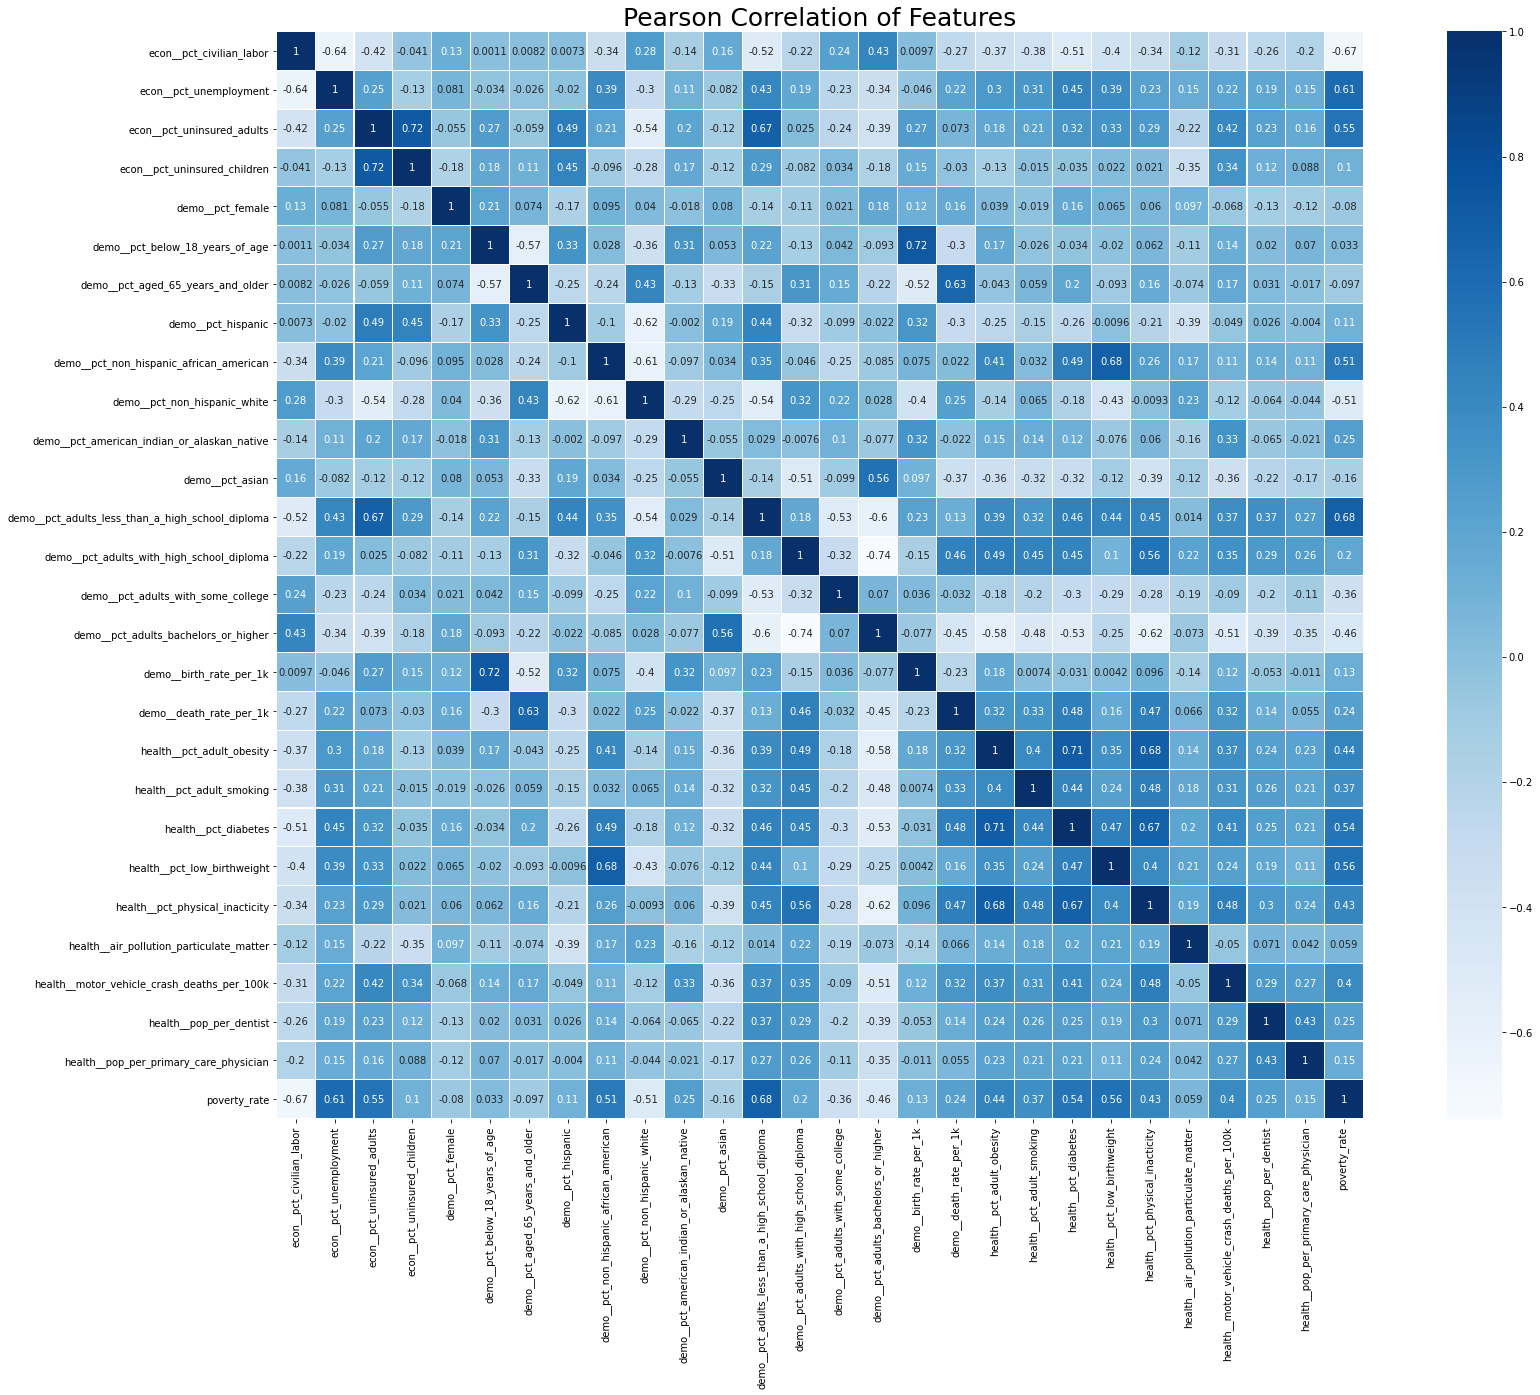

In [ ]:
corr = df.corr()
f,ax = plt.subplots(figsize=(30,20))
heatmap= sns.heatmap(corr,cmap="Blues",square=True,ax=ax,annot=True,linewidth=0.1)
plt.title('Pearson Correlation of Features',y=2.05,size=25)

**Dummy Encoding**

In [ ]:
dummies = pd.get_dummies(df.area__rucc)
dummies1 = pd.get_dummies(df.area__urban_influence)
dummies2 = pd.get_dummies(df.econ__economic_typology)
dummies3 = pd.get_dummies(df.yr)
merged = pd.concat([df,dummies,dummies1,dummies2,dummies3],axis='columns')
df = merged.drop(['area__rucc','area__urban_influence','econ__economic_typology','yr'],axis='columns')

**Linear Regression Model**

In [ ]:
# Machine Learning using Scikit packages
# Assigning the dependent variable to y
y = df.poverty_rate
# Assigning all variables except dependent variable to X
X = df.drop('poverty_rate', axis=1)
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=123)

# Downloading Algorithm package from SciKit
from sklearn.linear_model import LinearRegression

# Setting the Algorithm to a variable
regressor = LinearRegression()

# Using Training dataset with the Algorithm
clf_reg = regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = clf_reg.predict(X_test)

In [ ]:
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.7785609250341978
2.3479404480123085


**Gradient Boosting Regressor**

In [ ]:
y = df.poverty_rate
# Assigning all variables except dependent variable to X
X = df.drop('poverty_rate', axis=1)
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
gradientregressor = GradientBoostingRegressor()
model = gradientregressor.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [ ]:
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.8118464437852242
2.1809590210131646


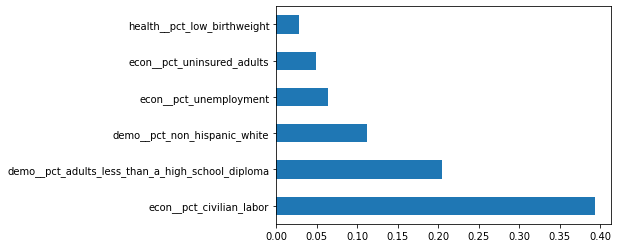

In [ ]:
(pd.Series(model.feature_importances_, index=X.columns)
   .nlargest(6)
   .plot(kind='barh'))